In [103]:
# ładowanie bibliotek

import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
#import gc
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [104]:
# ustawienia

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [105]:
# load data from website
# data = pd.read_csv('https://jakubmichalak.com.pl/flat.csv', delimiter=";", decimal=",")

# # explore data
# print(data.head())

# # explore data types
# data.dtypes

In [106]:
data = pd.read_csv('https://jakubmichalak.com.pl/3_transakcje_final.csv', delimiter=";", decimal=",")

In [107]:
print(data.dtypes)

data_tran      object
kond          float64
rok_bud       float64
obreb           int64
adres          object
nr_budynku     object
miej_post     float64
pom_dod       float64
pom_pow       float64
cena            int64
pow           float64
liczba_izb      int64
dtype: object


In [120]:
# explore data
print(data.head(200))

# print(data.dtypes)

     data_tran  kond  rok_bud  obreb                adres nr_budynku  miej_post  pom_dod  pom_pow    cena     pow liczba_izb  unitprice  wiek  month
0   2021-02-11   1.0   2019.0     27          Żyrardowska         31          1        0     0.00  430450   88.58          4       4859   2.0      2
1   2021-01-25   2.0   2019.0     27          Żyrardowska         31          0        0     0.00  403000   56.15          2       7177   2.0      1
2   2021-01-07   1.0   2000.0     27             Bałtycka        11B          0        1     5.10  295000   41.85          3       7048  21.0      1
3   2021-01-04   2.0   1950.0     23           Pileckiego          4          0        1    10.30  240000   33.00          2       7272  71.0      1
4   2021-01-08   4.0   2016.0     22             Bałtycka        30B          1        0     0.00  290000   44.70          2       6487   5.0      1
5   2021-01-08   2.0   2014.0     16          Narutowicza         9A          1        0     0.00  350000 

In [121]:
# convert string to date
data['data_tran'] = pd.to_datetime(data['data_tran'], format='%Y-%m-%d')

# convert integer to string
# data['kond'] = [str(x) for x in data['kond']]
data['liczba_izb'] = [str(x) for x in data['liczba_izb']]


# fill nulls in columns

data['pom_dod'] = data['pom_dod'].fillna(0)

data['pom_pow'] = data['pom_pow'].fillna(0)

data['miej_post'] = data['miej_post'].fillna(0)

# convert float to integer

data['pom_dod'] = [int(x) for x in data['pom_dod'] if x is not None]
data['miej_post'] = [int(x) for x in data['miej_post'] if x is not None]

data['rok_bud'] = [int(x) if pd.notnull(x) else x for x in data['rok_bud'] ]


# add new target column
prices_unit = data['cena'] / data['pow']
data['unitprice'] = [int(x) for x in prices_unit]
data['wiek'] = 2021 - data['rok_bud']
# data['wiek'] = data['wiek'].apply(lambda x: int(x) if pd.notnull(x) and str(x).isdigit() else False)

# Utwórz kolumnę z miesiącem
data['month'] = data['data_tran'].dt.month
# data['bimonth'] = (data['data_tran'].dt.month - 1) // 2 + 1


In [122]:
# ANALIZA KOLUMN Z NULL

# print(data[data['wiek'].isnull()])

# print(data[data['kond'].isnull()])

braki_kond = data[data['kond'].isnull()]['kond'].isna().count()/data['kond'].count()

print(f'Braki w kolumnie kondygnacja wynoszą {round(braki_kond*100,2)} %')

braki_wiek = data[data['wiek'].isnull()]['wiek'].isna().count()/data['wiek'].count()

print(f'Braki w kolumnie wiek wynoszą {round(braki_wiek*100,2)} %')



Braki w kolumnie kondygnacja wynoszą 14.18 %
Braki w kolumnie wiek wynoszą 5.52 %


Empty DataFrame
Columns: [data_tran, kond, rok_bud, obreb, adres, nr_budynku, miej_post, pom_dod, pom_pow, cena, pow, liczba_izb, unitprice, wiek, month]
Index: []


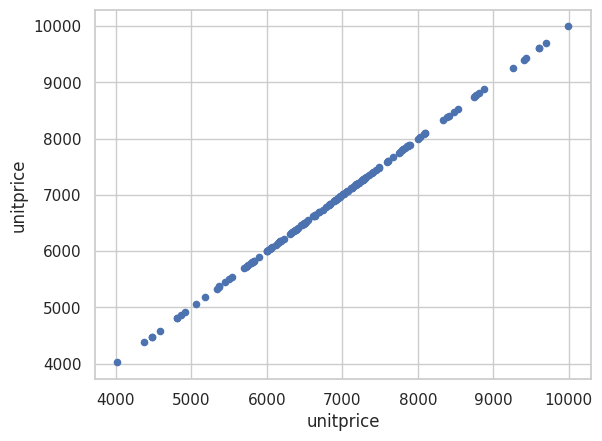

In [123]:
# analiza wizualna cen jednsotkowych w celu detekcji wartości odstających

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"



data.plot (kind = 'scatter', x= 'unitprice', y= 'unitprice')


print (data[data['unitprice'] > 20000])

# data = data[data['unitprice'] < 20000]

In [124]:
# usunięcie wartosci odstających


data = data[data['unitprice'] < 20000]

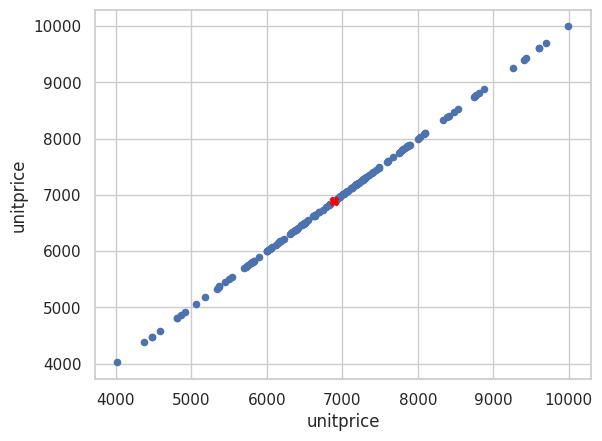

In [125]:
# wykres po usunięciu

ax = data.plot (kind = 'scatter', x= 'unitprice', y= 'unitprice')

mean_price = data['unitprice'].mean()

ax.scatter(mean_price, mean_price, color = 'red', marker = 'X')

plt.show()

In [126]:
print(data[data['unitprice'] < 6000])

     data_tran  kond  rok_bud  obreb               adres nr_budynku  miej_post  pom_dod  pom_pow    cena     pow liczba_izb  unitprice  wiek  month
0   2021-02-11   1.0   2019.0     27         Żyrardowska         31          1        0     0.00  430450   88.58          4       4859   2.0      2
12  2021-01-22   1.0   1961.0     57            Sportowa        33A          0        1    12.40  240000   47.40          3       5063  60.0      1
17  2021-02-23   4.0   1987.0     33     Szczerkowskiego          3          0        1     2.80  220000   48.00          3       4583  34.0      2
20  2021-02-03   4.0   2003.0     34              Teligi         14          0        1     3.80  430000   89.50          5       4804  18.0      2
23  2021-02-25   4.0   2011.0     43        Sienkiewicza        33A          0        0     0.00  390000   66.91          3       5828  10.0      2
29  2021-03-16   2.0   1983.0     31      Armii Krajowej          7          0        1     2.10  358000   59.70

12.36931687685298


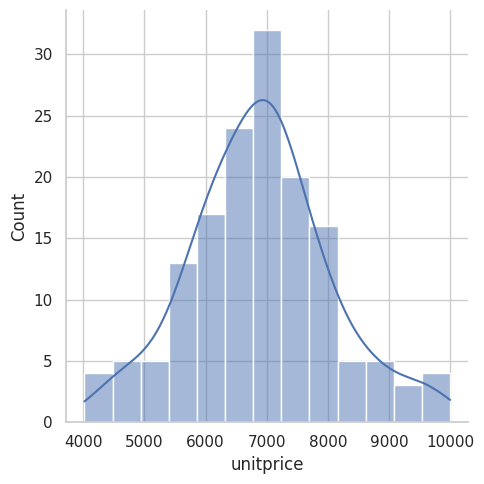

In [127]:
# histogram

bins_number = np.sqrt(len(data))

print(bins_number)

sns.displot(data['unitprice'], kde = True)

In [128]:
index = data.groupby('month')['unitprice'].mean().to_frame()
index_mt = [0] * 12
# indes = pd.DataFrame(index)

for i in range(12):
    index_mt[i] = index['unitprice'][i+1] / index['unitprice'][12] 

In [30]:
index_mt

[0.8779869484953736,
 0.8431140126923918,
 0.8645882267123788,
 0.8735079145087169,
 0.9208212460090788,
 0.8893271365005262,
 0.8755270260412867,
 1.059785542344445,
 0.9561028729822952,
 0.8831410022612882,
 0.9162343820013963,
 1.0]

In [129]:
data['unitpriceindex'] = data.apply(lambda row: row['unitprice'] / index_mt[row['month']-1], axis=1)

In [130]:
print(data)

     data_tran  kond  rok_bud  obreb                adres nr_budynku  miej_post  pom_dod  pom_pow    cena     pow liczba_izb  unitprice  wiek  month  unitpriceindex
0   2021-02-11   1.0   2019.0     27          Żyrardowska         31          1        0     0.00  430450   88.58          4       4859   2.0      2     5763.158869
1   2021-01-25   2.0   2019.0     27          Żyrardowska         31          0        0     0.00  403000   56.15          2       7177   2.0      1     8174.381194
2   2021-01-07   1.0   2000.0     27             Bałtycka        11B          0        1     5.10  295000   41.85          3       7048  21.0      1     8027.454180
3   2021-01-04   2.0   1950.0     23           Pileckiego          4          0        1    10.30  240000   33.00          2       7272  71.0      1     8282.583258
4   2021-01-08   4.0   2016.0     22             Bałtycka        30B          1        0     0.00  290000   44.70          2       6487   5.0      1     7388.492518
5   2021-0

In [131]:
statsPre = data.groupby('month')['unitprice'].agg(['count','mean', 'median','std']).reset_index()
statsPost = data.groupby('month')['unitpriceindex'].agg(['count','mean', 'median','std']).reset_index()

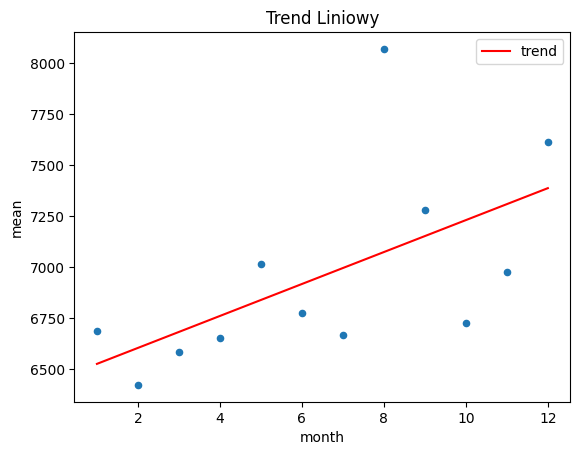

Dla zbioru danych wyraz wolny (intercept) wynosi 6446.173035298036, natomiast współczynnik kierunkowy (slope) wynosi 78.45563474986548. Współczynnik R2 wynosi 0.3455645920406919


In [20]:
X = np.array(statsPre['month']).reshape(-1, 1)
y = np.array(statsPre['mean'])
# fit the model
reg = LinearRegression().fit(X, y)
statsPre['trend'] = reg.predict(X)

modelScore = reg.score(X, y)

fig, ax = plt.subplots()
statsPre.plot.scatter(x='month', y = 'mean', title = 'Trend Liniowy', ax = ax)
statsPre.plot.line(x = 'month', y = 'trend', ax = ax, c = 'red')
plt.show()

# statsPre.plot(x='month', y = 'mean', title = 'Średnia cena w miesiącu przed indeksacją')


print(f'Dla zbioru danych wyraz wolny (intercept) wynosi {reg.intercept_}, natomiast współczynnik kierunkowy (slope) wynosi {reg.coef_[0]}. Współczynnik R2 wynosi {modelScore}')



In [132]:
data['unitpricelinear'] = data.apply(lambda row: row['unitprice'] + reg.coef_[0] * (13 - row['month']), axis=1)


statsLinear= data.groupby('month')['unitpricelinear'].agg(['count','mean', 'median','std']).reset_index()


<Axes: title={'center': 'Średnia cena w miesiącu po indeksacji'}, xlabel='month'>

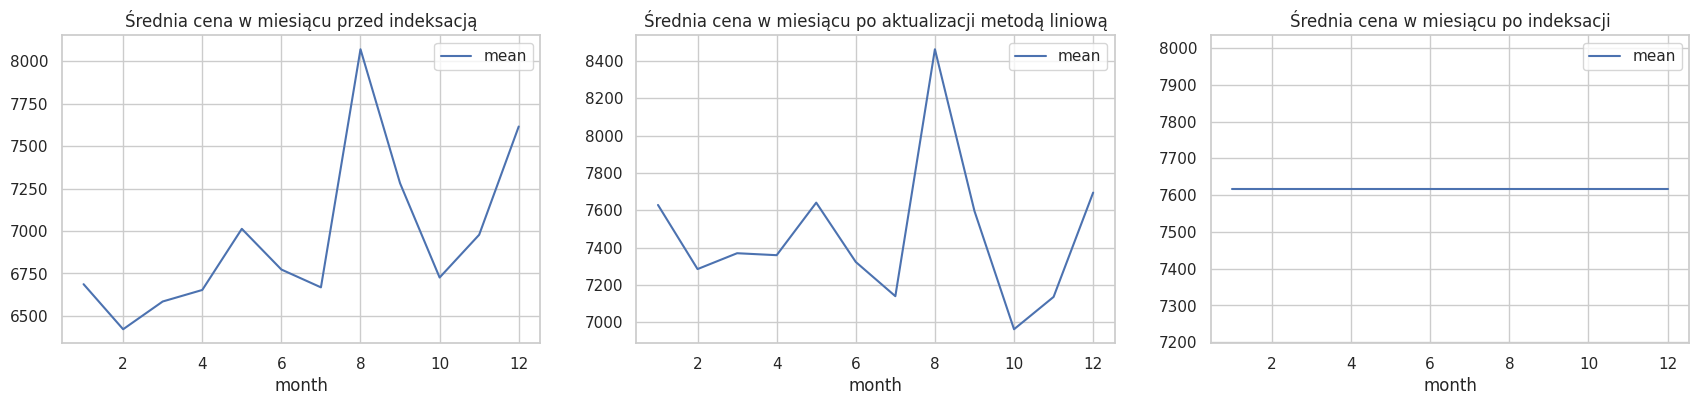

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(21,4)

statsPre.plot(x='month', y = 'mean', ax=ax[0], title = 'Średnia cena w miesiącu przed indeksacją')
statsLinear.plot(x='month', y = 'mean', ax=ax[1], title = 'Średnia cena w miesiącu po aktualizacji metodą liniową')
statsPost.plot(x='month', y = 'mean', ax=ax[2], title = 'Średnia cena w miesiącu po indeksacji')

12.36931687685298


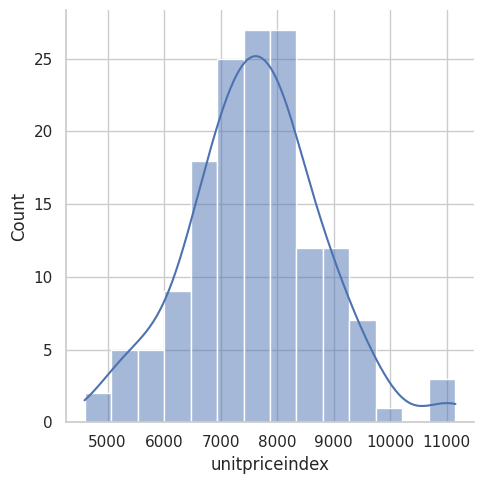

In [134]:
# histogram

bins_number = np.sqrt(len(data))

print(bins_number)

sns.displot(data['unitpriceindex'], kde = True)

In [135]:
data_corr = data.filter(['unitpriceindex', 'kond', 'wiek', 'miej_post', 'pom_dod', 'pow', 'liczba_izb'], axis = 1)
data_corr.corr()

,unitpriceindex,kond,wiek,miej_post,pom_dod,pow,liczba_izb
unitpriceindex,1.000000,-0.098387,-0.316142,0.196452,-0.218750,-0.348641,-0.456462
kond,-0.098387,1.000000,0.017943,0.076656,0.056512,0.028409,0.135040
wiek,-0.316142,0.017943,1.000000,-0.404465,0.387293,-0.201323,0.214450
miej_post,0.196452,0.076656,-0.404465,1.000000,-0.340065,0.278181,0.064666
pom_dod,-0.218750,0.056512,0.387293,-0.340065,1.000000,0.004257,0.172062
pow,-0.348641,0.028409,-0.201323,0.278181,0.004257,1.000000,0.671932
liczba_izb,-0.456462,0.135040,0.214450,0.064666,0.172062,0.671932,1.000000


In [136]:
data_corr.corr()

,unitpriceindex,kond,wiek,miej_post,pom_dod,pow,liczba_izb
unitpriceindex,1.000000,-0.098387,-0.316142,0.196452,-0.218750,-0.348641,-0.456462
kond,-0.098387,1.000000,0.017943,0.076656,0.056512,0.028409,0.135040
wiek,-0.316142,0.017943,1.000000,-0.404465,0.387293,-0.201323,0.214450
miej_post,0.196452,0.076656,-0.404465,1.000000,-0.340065,0.278181,0.064666
pom_dod,-0.218750,0.056512,0.387293,-0.340065,1.000000,0.004257,0.172062
pow,-0.348641,0.028409,-0.201323,0.278181,0.004257,1.000000,0.671932
liczba_izb,-0.456462,0.135040,0.214450,0.064666,0.172062,0.671932,1.000000


In [137]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(data['miej_post'], data['unitpriceindex'])
print(f'Współczynnik korelacji: {corr}, p-value: {p_value}')


Współczynnik korelacji: 0.1964520912447595, p-value: 0.014940601369837827


In [41]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(data['pom_dod'], data['unitpriceindex'])
print(f'Współczynnik korelacji: {corr}, p-value: {p_value}')


Współczynnik korelacji: -0.2187504039615938, p-value: 0.006595917755989705


In [42]:
from scipy.stats import kruskal

# Grupujemy ceny według kondygnacji
grupy = [group['unitpriceindex'].values for _, group in data.groupby('kond')]

# Test Kruskala-Wallisa
stat, p_value = kruskal(*grupy)

print(f'Test Kruskala-Wallisa: stat={stat}, p-value={p_value}')

#
#Interpretacja wyniku testu Kruskala-Wallisa:

#    Statystyka testowa = 2.24 → sugeruje niewielkie różnice między grupami.

#    p-value = 0.945 → znacznie większe niż 0.05.

#Wniosek:

#➡ Nie ma statystycznie istotnych różnic między cenami na różnych kondygnacjach.
#➡ Oznacza to, że piętro nie ma znaczącego wpływu na cenę za m² w Twoim zbiorze danych.


Test Kruskala-Wallisa: stat=2.2124292272247885, p-value=0.8991615650570742


In [138]:
rozklad_kondygnacji = data.groupby(['kond'])['unitpriceindex'].agg(['count','mean','median', 'std'])
print(rozklad_kondygnacji)

      count         mean       median          std
kond                                              
1.0      34  7708.682561  7673.979486  1243.527152
2.0      28  7541.572336  7677.084134   977.564671
3.0      23  7793.391821  7628.886186  1365.529858
4.0      34  7521.165057  7611.979862  1233.997262
5.0      12  7278.367045  7137.453871  1264.455518
6.0       2  6729.510835  6729.510835  1557.937579
8.0       1  7359.572804  7359.572804          NaN


In [140]:
def grupuj_kond(kond):
    if kond == 1:
        return 0
    elif kond == 2:
        return 1
    elif kond == 3:
        return 2
    elif kond == 4:
        return 3
    elif kond >= 5:
        return 4
    else:
        return np.nan

data['pietro'] = data['kond'].apply(grupuj_kond)       

In [141]:
rozklad_kondygnacji = data.groupby(['pietro'])['unitpriceindex'].agg(['count','mean','median', 'std'])
print(rozklad_kondygnacji)

        count         mean       median          std
pietro                                              
0.0        34  7708.682561  7673.979486  1243.527152
1.0        28  7541.572336  7677.084134   977.564671
2.0        23  7793.391821  7628.886186  1365.529858
3.0        34  7521.165057  7611.979862  1233.997262
4.0        15  7210.599935  7241.199292  1211.689781


In [61]:
from scipy.stats import kruskal

# Grupujemy ceny według kondygnacji
grupy = [group['unitpriceindex'].values for _, group in data.groupby('pietro')]

# Test Kruskala-Wallisa
stat, p_value = kruskal(*grupy)

print(f'Test Kruskala-Wallisa: stat={stat}, p-value={p_value}')

Test Kruskala-Wallisa: stat=2.0367962808455786, p-value=0.7289909630676161


In [82]:
from scipy.stats import chi2

# Liczba grup (np. pięter)
k = 5

# Poziom istotności
alpha = 0.05

# Liczba stopni swobody
df = k - 1

# Wartość krytyczna chi-kwadrat
critical_value = chi2.ppf(1 - alpha, df)
print(f"Wartość krytyczna chi-kwadrat dla df={df} i poziomu istotności={alpha}: {critical_value}")


Wartość krytyczna chi-kwadrat dla df=4 i poziomu istotności=0.05: 9.487729036781154


In [48]:
from scipy.stats import shapiro

data_tmp = data.filter(['unitpriceindex', 'pietro'], axis = 1)
data_tmp = data_tmp.dropna()

for floor in data_tmp['pietro'].unique():
    stat, p = shapiro(data_tmp[data_tmp['pietro'] == floor]['unitpriceindex'])
    print(f'Piętro {floor}: stat={stat}, p-value={p}')


Piętro 0.0: stat=0.9772326331813788, p-value=0.6837140756066346
Piętro 1.0: stat=0.9175449955578463, p-value=0.03017558360843982
Piętro 3.0: stat=0.9758111877375618, p-value=0.6375488711350759
Piętro 2.0: stat=0.897742829122309, p-value=0.022718451118486756
Piętro 4.0: stat=0.9851250160489458, p-value=0.9930349115961088


In [50]:
data['pietro'].unique()

array([ 0.,  1.,  3., nan,  2.,  4.])

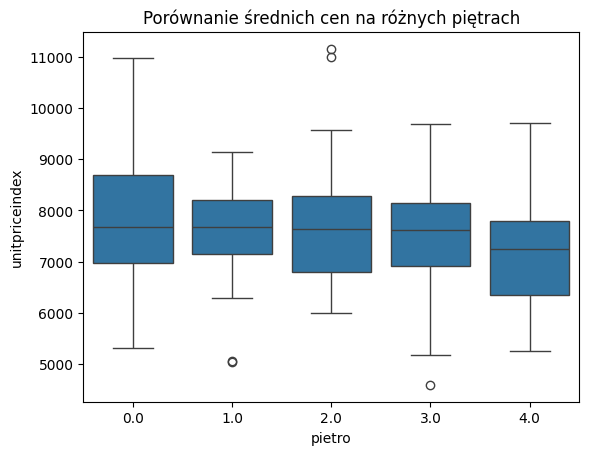

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['pietro'], y=data['unitpriceindex'])
plt.title("Porównanie średnich cen na różnych piętrach")
plt.show()


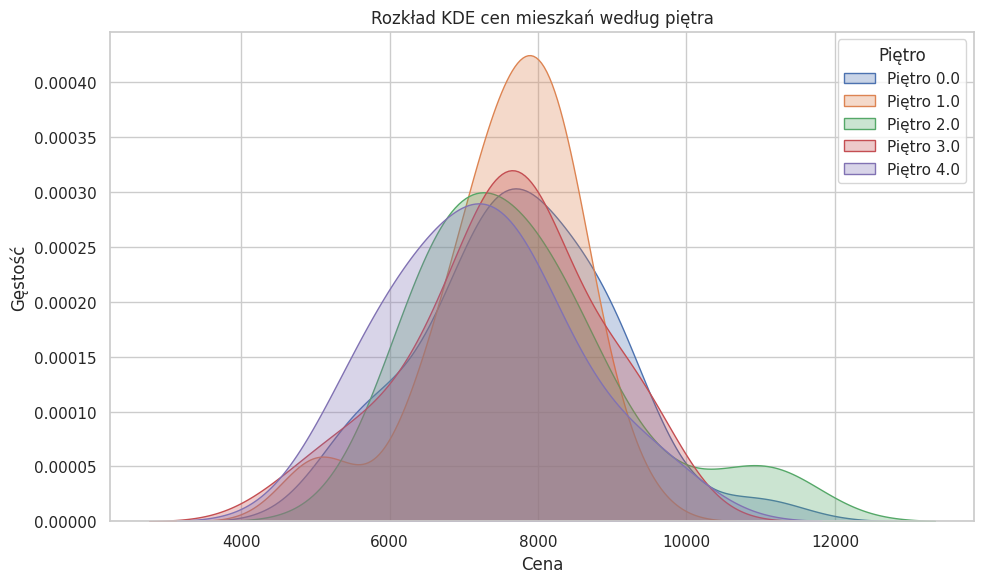

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ustawienia stylu (opcjonalnie)
sns.set(style="whitegrid")

# Rysowanie wielu KDE na jednym wykresie
plt.figure(figsize=(10, 6))

# Lista pięter, które chcesz porównać
pietra = [0.0, 1.0, 2.0, 3.0, 4.0]

# Pętla po piętrach i rysowanie KDE dla każdego
for p in pietra:
    subset = data[data["pietro"] == p]["unitpriceindex"]
    sns.kdeplot(subset, label=f"Piętro {p}", fill=True, alpha=0.3)

# Dodatki
plt.title("Rozkład KDE cen mieszkań według piętra")
plt.xlabel("Cena")
plt.ylabel("Gęstość")
plt.legend(title="Piętro")
plt.tight_layout()
plt.show()


In [142]:
data_corr = data.filter(['unitpriceindex', 'pietro', 'wiek', 'miej_post', 'pom_dod', 'pow', 'liczba_izb'], axis = 1)
data_corr.corr()

,unitpriceindex,pietro,wiek,miej_post,pom_dod,pow,liczba_izb
unitpriceindex,1.000000,-0.093833,-0.316142,0.196452,-0.218750,-0.348641,-0.456462
pietro,-0.093833,1.000000,-0.004146,0.094007,0.030725,0.031589,0.111520
wiek,-0.316142,-0.004146,1.000000,-0.404465,0.387293,-0.201323,0.214450
miej_post,0.196452,0.094007,-0.404465,1.000000,-0.340065,0.278181,0.064666
pom_dod,-0.218750,0.030725,0.387293,-0.340065,1.000000,0.004257,0.172062
pow,-0.348641,0.031589,-0.201323,0.278181,0.004257,1.000000,0.671932
liczba_izb,-0.456462,0.111520,0.214450,0.064666,0.172062,0.671932,1.000000


η² (eta squared): 0.0155


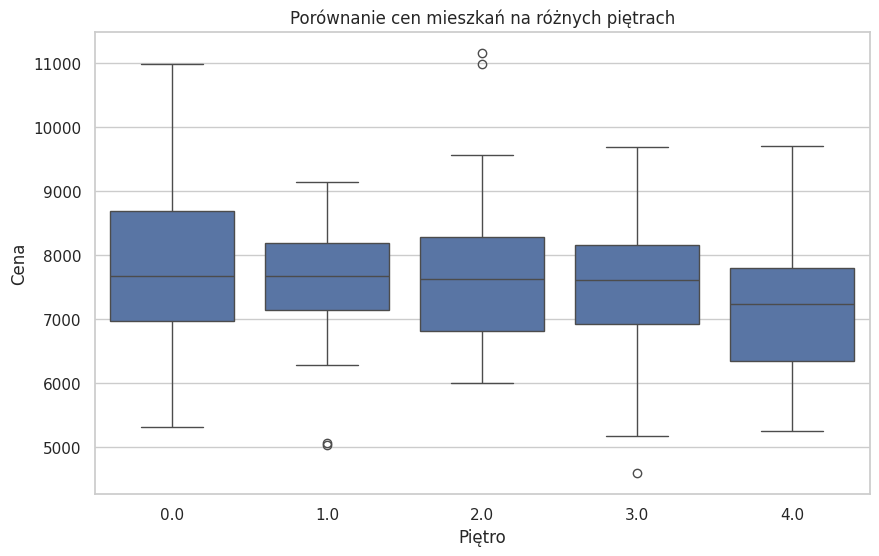

In [63]:
import numpy as np
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns

# Załóżmy, że masz dane w zmiennej 'data'
# Grupujemy ceny według kondygnacji
grupy = [group['unitpriceindex'].values for _, group in data.groupby('pietro')]

# Test Kruskala-Wallisa
stat, p_value = kruskal(*grupy)

# Liczba grup (pięter) i obserwacji
k = len(grupy)  # liczba grup
n = sum(len(group) for group in grupy)  # liczba obserwacji

# Obliczanie miary siły efektu (η²)
eta_squared = stat / (stat + (n - k))
print(f'η² (eta squared): {eta_squared:.4f}')

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
sns.boxplot(x='pietro', y='unitpriceindex', data=data)
plt.title('Porównanie cen mieszkań na różnych piętrach')
plt.xlabel('Piętro')
plt.ylabel('Cena')
plt.show()


# ANALIZA CECHY LOKALIZACJI

In [81]:
from scipy.stats import kruskal

# Grupujemy ceny według kondygnacji
grupy = [group['unitpriceindex'].values for _, group in data.groupby('obreb')]

# Test Kruskala-Wallisa
stat, p_value = kruskal(*grupy)

print(f'Test Kruskala-Wallisa: stat={stat}, p-value={p_value}')

Test Kruskala-Wallisa: stat=35.75866839262784, p-value=0.057916559704661606


In [153]:
obreby_analityka = data[data['wiek'] <= 21].groupby(['adres'])['unitpriceindex'].agg(['count','mean','median', 'std'])

print(obreby_analityka)

                 count          mean        median          std
adres                                                          
11 Listopada         1  10995.893501  10995.893501          NaN
3 maja               4   7446.250254   7776.785315  1525.016481
Bairda               4   9148.028057   9294.342169   605.682335
Bałtycka             5   8646.103635   8027.454180  1741.665032
Cegielniana          3   7390.152925   7552.504068   369.684130
Głogowa              2   8814.955748   8814.955748   998.283751
Jaśminowa            2   7315.655007   7315.655007   141.310871
Leśna                3   7060.800289   6934.110040   522.489854
Na laski             1   7233.538951   7233.538951          NaN
Nadarzyńska          1   9015.373380   9015.373380          NaN
Narutowcza           1   6283.072751   6283.072751          NaN
Narutowicza          8   8170.199663   8409.783728  1336.888354
Obrońców Getta       2   6950.001119   6950.001119   448.906166
Okulickiego          1   7628.886186   7

In [157]:
print(data[(data['adres']=='Bałtycka') & (data['wiek'] < 21)])

    data_tran  kond  rok_bud  obreb     adres nr_budynku  miej_post  pom_dod  pom_pow    cena    pow liczba_izb  unitprice  wiek  month  unitpriceindex  unitpricelinear  pietro
4  2021-01-08   4.0   2016.0     22  Bałtycka        30B          1        0      0.0  290000  44.70          2       6487   5.0      1     7388.492518      7428.467617     3.0
35 2021-02-19   3.0   2016.0     22  Bałtycka        30A          1        0      0.0  420000  44.65          2       9406   5.0      2    11156.261026     10269.011982     2.0
87 2021-07-19   4.0   2016.0     22  Bałtycka        30A          1        0      0.0  415000  48.95          2       8478   5.0      7     9683.310449      8948.733808     3.0


In [149]:
print(data[data['adres']=='11 Listopada'])

     data_tran  kond  rok_bud  obreb         adres nr_budynku  miej_post  pom_dod  pom_pow    cena    pow liczba_izb  unitprice  wiek  month  unitpriceindex  unitpricelinear  pietro
51  2021-04-28   3.0   2013.0     24  11 Listopada          8          0        0      0.0  292000   30.4          1       9605   8.0      4    10995.893501     10311.100713     2.0
77  2021-06-17   1.0   1960.0     23  11 Listopada      13/15          0        0      0.0  550000  102.4          5       5371  61.0      6     6039.397405      5920.189443     0.0
108 2021-09-15   1.0   1958.0     24  11 Listopada          4          0        1     12.5  360000   67.5          4       5333  63.0      9     5577.851663      5646.822539     0.0


In [89]:
obreby_analityka = data.groupby(['obreb'])['unitpriceindex'].agg(['count','mean','median', 'std'])

print(obreby_analityka)

       count         mean       median          std
obreb                                              
12         8  8748.587687  8706.678235   688.221953
14         2  7315.655007  7315.655007   141.310871
16        12  7925.931499  8076.933811  1225.160399
21         2  8814.955748  8814.955748   998.283751
22         3  9409.354664  9683.310449  1898.765049
23        14  7021.655384  7298.605275   927.848861
24         3  8251.362340  8180.341858  2709.719039
27        14  7514.028876  7751.151715  1023.165299
28        13  7428.242928  7639.281417  1082.339158
29         1  7628.886186  7628.886186          NaN
30         4  7551.137033  7453.949990  1013.752919
31         9  7132.834306  7165.104492   734.467756
32         2  8730.451218  8730.451218   605.316394
33        18  7640.428284  7948.344018  1441.224429
34        17  7617.812794  7559.337882  1160.344790
41        16  7508.883885  7473.396784  1118.968264
42         2  6795.413171  6795.413171    54.307778
43         2

In [147]:
print(data[data['obreb'] == 24])

     data_tran  kond  rok_bud  obreb         adres nr_budynku  miej_post  pom_dod  pom_pow    cena    pow liczba_izb  unitprice  wiek  month  unitpriceindex  unitpricelinear  pietro
51  2021-04-28   3.0   2013.0     24  11 Listopada          8          0        0      0.0  292000  30.40          1       9605   8.0      4    10995.893501     10311.100713     2.0
78  2021-06-23   2.0   2017.0     24      Składowa          6          0        0      0.0  365000  50.17          3       7275   4.0      6     8180.341858      7824.189443     1.0
108 2021-09-15   1.0   1958.0     24  11 Listopada          4          0        1     12.5  360000  67.50          4       5333  63.0      9     5577.851663      5646.822539     0.0


In [88]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd

# Wczytaj dane
flat_data = pd.read_csv('https://jakubmichalak.com.pl/flat.csv', delimiter=";", decimal=",")

# Grupowanie danych według obrębów
transaction_counts = flat_data['obreb'].value_counts()
# transaction_counts = data.groupby('obreb').mean()['unitprice']

# Wczytaj mapę
map_path = '/home/jakub/Downloads/obreby_grodzisk.png'
# map_path = 'https://jakubmichalak.com.pl/obreby_grodzisk.png'
map_image = Image.open(map_path)

width = map_image.size[0] 
height = map_image.size[1] 
for i in range(0,width):# process all pixels
    for j in range(0,height):
        data_p = map_image.getpixel((i,j))
        if data_p[0] > 249 and data_p[1] < 90 and data_p[2] > 110 :
            map_image.putpixel((i,j),(0, 0, 0))
        # if data[2] < 50:
        #     map_image.putpixel((i,j),(255, 255, 255))
        else :
            map_image.putpixel((i,j),(255, 255, 255))

# map_image.show()



draw = ImageDraw.Draw(map_image)

# draw.text((40,40), '20', fill='blue')

myFont = ImageFont.truetype('calibri-regular.ttf', 14)

print (list(map_image.size))

# Współrzędne obrębów (należy uzupełnić dla każdego obrębu)
coords = {
    33: (565, 174),
    41: (317, 394),
    34: (580, 213),
    27: (289, 340),
    28: (396, 319),
    23: (300, 300),
    31: (484, 254),
    16: (184, 255),
    12: (351, 199),
    30: (456, 281),
    24: (351, 301),
    55: (263, 496),
    22: (257, 329),
    42: (340, 362),
    62: (634, 406),
    32: (517, 236),
    14: (547, 148),
    21: (223, 357),
    43: (386, 381),
    44: (465, 369),
    29: (426, 294),
    60: (427, 405),
    53: (715, 256),
    64: (738, 347),
    
    # Dodaj współrzędne dla innych obrębów...
}

rank1 = (253,231,37)
rank2 = (173,220,48)
rank3 = (94,201,98)
rank4 = (40,174,128)
rank5 = (33,145,140)
rank6 = (44,114,142)
rank7 = (59,82,139)
rank8 = (71,45,123)
rank9 = (68,1,84)

viridis = {
18:(253,231,37),
17:(253,231,37),
16:(173,220,48),
15:(173,220,48),
14:(94,201,98),
13:(94,201,98),
12:(40,174,128),
11:(40,174,128),
10:(33,145,140),
9:(33,145,140),
8:(44,114,142),
7:(44,114,142),
6:(59,82,139),
5:(59,82,139),
4:(71,45,123),
3:(71,45,123),
2:(68,1,84),
1:(68,1,84)
}

# ImageDraw.floodfill(map_image, (528,198), rank1, thresh = 300)
# ImageDraw.floodfill(map_image, (204,330), rank1, thresh = 300)

# Dodaj liczby transakcji na mapę
for obreb, count in transaction_counts.items():
    if obreb in coords:
        x, y = coords[obreb]
        # viridis.get(count)
        ImageDraw.floodfill(map_image, (x,y), viridis.get(count), thresh = 25)
        # if count < 6:
        #     ImageDraw.floodfill(map_image, (x,y), rank4, thresh = 25)
        # if count < 10 and count > 5:
        #     ImageDraw.floodfill(map_image, (x,y), rank3, thresh = 25)
        # if count < 15 and count > 9:
        #     ImageDraw.floodfill(map_image, (x,y), rank2, thresh = 25)
        # if count > 14:
        #     ImageDraw.floodfill(map_image, (x,y), rank1, thresh = 25)
           
        draw.text((x, y), str(count), font = myFont , fill=(255,255,255), align="center")

# Zapisz mapę z naniesionymi danymi
output_path = '/home/jakub/Downloads/obreby_grodzisk2.png'
map_image.save(output_path)

map_image.show()


[855, 628]


In [93]:
obreby_analityka['median']

obreb
12    8706.678235
14    7315.655007
16    8076.933811
21    8814.955748
22    9683.310449
23    7298.605275
24    8180.341858
27    7751.151715
28    7639.281417
29    7628.886186
30    7453.949990
31    7165.104492
32    8730.451218
33    7948.344018
34    7559.337882
41    7473.396784
42    6795.413171
43    7136.021213
44    9015.373380
45    7233.538951
55    7599.244254
57    5766.600527
58    6957.919387
60    7448.676817
62    6934.110040
Name: median, dtype: float64

In [92]:
obreby_klastry = obreby_analityka[['obreb', 'median']]

KeyError: "['obreb'] not in index"

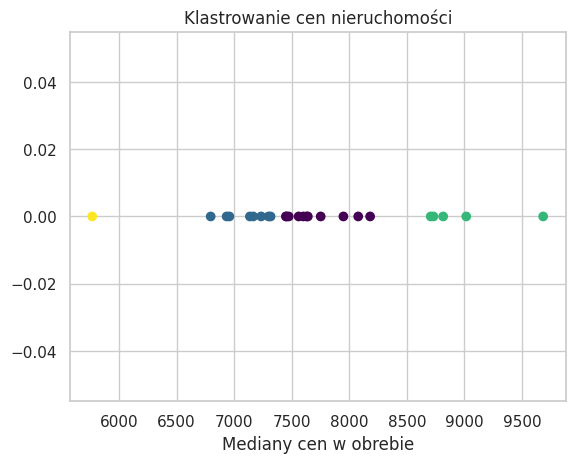

            median  lokalizacja
obreb                          
12     8706.678235            2
14     7315.655007            1
16     8076.933811            0
21     8814.955748            2
22     9683.310449            2
23     7298.605275            1
24     8180.341858            0
27     7751.151715            0
28     7639.281417            0
29     7628.886186            0
30     7453.949990            0
31     7165.104492            1
32     8730.451218            2
33     7948.344018            0
34     7559.337882            0
41     7473.396784            0
42     6795.413171            1
43     7136.021213            1
44     9015.373380            2
45     7233.538951            1
55     7599.244254            0
57     5766.600527            3
58     6957.919387            1
60     7448.676817            0
62     6934.110040            1


In [99]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Zakładając, że 'obreby_analityka' to istniejący DataFrame z kolumną 'median'
# np. obreby_analityka['median'] to ceny nieruchomości

# Skalowanie danych (jeśli konieczne)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(obreby_analityka['median'].values.reshape(-1, 1))  # Reshape, aby było 2-wymiarowe

# Wybór liczby klastrów - np. 3
kmeans = KMeans(n_clusters=4, random_state=42)
obreby_analityka['lokalizacja'] = kmeans.fit_predict(data_scaled)

# Wizualizacja
plt.scatter(obreby_analityka['median'], np.zeros_like(obreby_analityka['median']), c=obreby_analityka['lokalizacja'], cmap='viridis')
plt.title('Klastrowanie cen nieruchomości')
plt.xlabel('Mediany cen w obrebie')
plt.show()

# Podgląd wyników
print(obreby_analityka[['median', 'lokalizacja']])



# Analiza cechy wiek

In [75]:
filtered = data.loc[data['wiek']>19]


stats = filtered['unitprice'].agg(['count','mean', 'median', 'std']).reset_index()

print(stats)

    index    unitprice
0   count    61.000000
1    mean  6576.180328
2  median  6485.000000
3     std  1042.383591


In [76]:
filtered = data.loc[data['wiek']<20]

stats = filtered['unitprice'].agg(['count','mean', 'median', 'std']).reset_index()

print(stats)

    index    unitprice
0   count    84.000000
1    mean  7164.523810
2  median  7121.500000
3     std  1162.839653


<Axes: xlabel='wiek', ylabel='unitprice'>

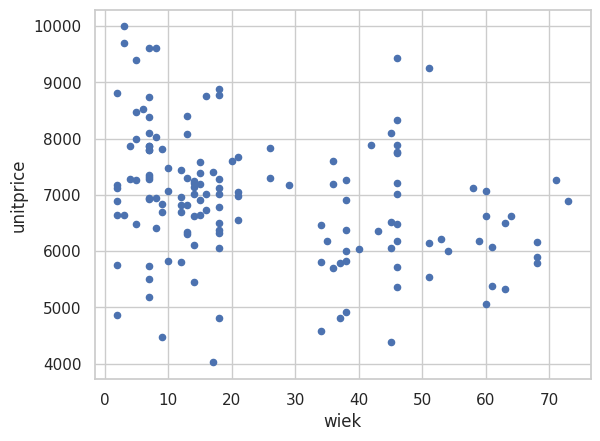

In [85]:
data.plot (kind = 'scatter', x= 'wiek', y= 'unitprice')

In [80]:
data.drop(columns=['upper_limit', 'lower_limit'], inplace=True)

KeyError: "['upper_limit', 'lower_limit'] not found in axis"

In [ ]:
data3 = pd.DataFrame(data['data_tran'].dt.month, columns=['month'])
data3['liczba'] = data['data_tran'].dt.month.value_counts().sort_index().values


# data2.groupby(data['data_tran'].dt.month).count()

In [ ]:
data

,data_tran,kond,rok_bud,obreb,adres,miej_post,pom_dod,cena,pow,unitprice,wiek,month,unitpricebeta
0,2021-01-25,2,2019,27,ŻYRARDOWSKA,0,0,403000,56.15,7177,2,1,8964.870444
1,2021-01-07,1,2000,27,BAŁTYCKA,0,1,295000,46.95,6283,21,1,7848.165111
2,2021-01-04,2,1950,23,PILECKIEGO,0,1,240000,43.40,5529,71,1,6906.335333
3,2021-01-08,4,2015,22,BAŁTYCKA,1,0,290000,44.70,6487,6,1,8102.983778
4,2021-01-08,2,2014,16,NARUTOWICZA,1,0,350000,50.46,6936,7,1,8663.834667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021-12-22,3,2012,33,3 MAJA,1,0,535000,68.50,7810,9,12,7810.000000
140,2021-12-11,1,2003,34,TELIGI,0,1,285000,32.10,8878,18,12,8878.000000
141,2021-12-02,1,2000,27,BAŁTYCKA,0,1,200000,28.67,6975,21,12,6975.000000
142,2021-12-07,3,1985,28,KOŚCIUSZKI,0,1,330000,55.00,6000,36,12,6000.000000


In [ ]:
data['month'] = data['data_tran'].dt.month
data3 = data['month'].value_counts().sort_index().reset_index()
data3.columns = ['month', 'liczba']


In [ ]:
data3 = filtered_data['month'].value_counts().sort_index().reset_index()
data3.columns = ['month', 'liczba']


NameError: name 'filtered_data' is not defined

In [ ]:
data2['unitpricebeta'] = [int(x) for x in data2['unitpricebeta']]
# index[0]

In [ ]:
data2['data'] = data['data_tran']

In [ ]:
pr1 = data['unitprice'][data['miej_post']==1]
pr2 = data['unitprice'][data['miej_post']==0]

In [ ]:
pr1.mean()

NameError: name 'pr1' is not defined

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd

# Wczytaj dane
flat_data = pd.read_csv('https://jakubmichalak.com.pl/flat.csv', delimiter=";", decimal=",")

# Grupowanie danych według obrębów
transaction_counts = flat_data['obreb'].value_counts()
# transaction_counts = data.groupby('obreb').mean()['unitprice']

# Wczytaj mapę
map_path = '/home/jakub/Downloads/obreby_grodzisk.png'
# map_path = 'https://jakubmichalak.com.pl/obreby_grodzisk.png'
map_image = Image.open(map_path)

width = map_image.size[0] 
height = map_image.size[1] 
for i in range(0,width):# process all pixels
    for j in range(0,height):
        data_p = map_image.getpixel((i,j))
        if data_p[0] > 249 and data_p[1] < 90 and data_p[2] > 110 :
            map_image.putpixel((i,j),(0, 0, 0))
        # if data[2] < 50:
        #     map_image.putpixel((i,j),(255, 255, 255))
        else :
            map_image.putpixel((i,j),(255, 255, 255))

# map_image.show()



draw = ImageDraw.Draw(map_image)

# draw.text((40,40), '20', fill='blue')

myFont = ImageFont.truetype('calibri-regular.ttf', 14)

print (list(map_image.size))

# Współrzędne obrębów (należy uzupełnić dla każdego obrębu)
coords = {
    33: (565, 174),
    41: (317, 394),
    34: (580, 213),
    27: (289, 340),
    28: (396, 319),
    23: (300, 300),
    31: (484, 254),
    16: (184, 255),
    12: (351, 199),
    30: (456, 281),
    24: (351, 301),
    55: (263, 496),
    22: (257, 329),
    42: (340, 362),
    62: (634, 406),
    32: (517, 236),
    14: (547, 148),
    21: (223, 357),
    43: (386, 381),
    44: (465, 369),
    29: (426, 294),
    60: (427, 405),
    53: (715, 256),
    64: (738, 347),
    
    # Dodaj współrzędne dla innych obrębów...
}

rank1 = (253,231,37)
rank2 = (173,220,48)
rank3 = (94,201,98)
rank4 = (40,174,128)
rank5 = (33,145,140)
rank6 = (44,114,142)
rank7 = (59,82,139)
rank8 = (71,45,123)
rank9 = (68,1,84)

viridis = {
18:(253,231,37),
17:(253,231,37),
16:(173,220,48),
15:(173,220,48),
14:(94,201,98),
13:(94,201,98),
12:(40,174,128),
11:(40,174,128),
10:(33,145,140),
9:(33,145,140),
8:(44,114,142),
7:(44,114,142),
6:(59,82,139),
5:(59,82,139),
4:(71,45,123),
3:(71,45,123),
2:(68,1,84),
1:(68,1,84)
}

# ImageDraw.floodfill(map_image, (528,198), rank1, thresh = 300)
# ImageDraw.floodfill(map_image, (204,330), rank1, thresh = 300)

# Dodaj liczby transakcji na mapę
for obreb, count in transaction_counts.items():
    if obreb in coords:
        x, y = coords[obreb]
        # viridis.get(count)
        ImageDraw.floodfill(map_image, (x,y), viridis.get(count), thresh = 25)
        # if count < 6:
        #     ImageDraw.floodfill(map_image, (x,y), rank4, thresh = 25)
        # if count < 10 and count > 5:
        #     ImageDraw.floodfill(map_image, (x,y), rank3, thresh = 25)
        # if count < 15 and count > 9:
        #     ImageDraw.floodfill(map_image, (x,y), rank2, thresh = 25)
        # if count > 14:
        #     ImageDraw.floodfill(map_image, (x,y), rank1, thresh = 25)
           
        draw.text((x, y), str(count), font = myFont , fill=(255,255,255), align="center")

# Zapisz mapę z naniesionymi danymi
output_path = '/home/jakub/Downloads/obreby_grodzisk2.png'
map_image.save(output_path)

map_image.show()


[855, 628]


In [87]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd

# Wczytaj dane
flat_data = pd.read_csv('https://jakubmichalak.com.pl/flat.csv', delimiter=";", decimal=",")

# Grupowanie danych według obrębów
# transaction_counts = flat_data['obreb'].value_counts()
# transaction_counts = means.groupby('obreb').mean()['unitprice']

transaction_means = data.groupby(['obreb'])['unitprice'].mean()

# Wczytaj mapę
map_path = '/home/jakub/Downloads/obreby_grodzisk.png'
# map_path = 'https://jakubmichalak.com.pl/obreby_grodzisk.png'
map_image = Image.open(map_path)

width = map_image.size[0] 
height = map_image.size[1] 
for i in range(0,width):# process all pixels
    for j in range(0,height):
        data_px = map_image.getpixel((i,j))
        if data_px[0] > 249 and data_px[1] < 90 and data_px[2] > 110 :
            map_image.putpixel((i,j),(0, 0, 0))
        # if data[2] < 50:
        #     map_image.putpixel((i,j),(255, 255, 255))
        else :
            map_image.putpixel((i,j),(255, 255, 255))

# map_image.show()



draw = ImageDraw.Draw(map_image)

# draw.text((40,40), '20', fill='blue')

myFont = ImageFont.truetype('calibri-regular.ttf', 14)

print (list(map_image.size))

# Współrzędne obrębów (należy uzupełnić dla każdego obrębu)
coords = {
    33: (565, 174),
    41: (317, 394),
    34: (580, 213),
    27: (289, 340),
    28: (396, 319),
    23: (300, 300),
    31: (484, 254),
    16: (184, 255),
    12: (351, 199),
    30: (456, 281),
    24: (351, 301),
    55: (263, 496),
    22: (257, 329),
    42: (340, 362),
    62: (634, 406),
    32: (517, 236),
    14: (547, 148),
    21: (223, 357),
    43: (386, 381),
    44: (465, 369),
    29: (426, 294),
    60: (427, 405),
    53: (715, 256),
    64: (738, 347),
    
    # Dodaj współrzędne dla innych obrębów...
}

rank1 = (253,231,37)
rank2 = (173,220,48)
rank3 = (94,201,98)
rank4 = (40,174,128)
rank5 = (33,145,140)
rank6 = (44,114,142)
rank7 = (59,82,139)
rank8 = (71,45,123)
rank9 = (68,1,84)

viridis = {
18:(253,231,37),
17:(253,231,37),
16:(173,220,48),
15:(173,220,48),
14:(94,201,98),
13:(94,201,98),
12:(40,174,128),
11:(40,174,128),
10:(33,145,140),
9:(33,145,140),
8:(44,114,142),
7:(44,114,142),
6:(59,82,139),
5:(59,82,139),
4:(71,45,123),
3:(71,45,123),
2:(68,1,84),
1:(68,1,84)
}

# ImageDraw.floodfill(map_image, (528,198), rank1, thresh = 300)
# ImageDraw.floodfill(map_image, (204,330), rank1, thresh = 300)

# Dodaj liczby transakcji na mapę
for obreb, unitprice in transaction_means.items():
    if obreb in coords:
        x, y = coords[obreb]
        # viridis.get(count)
        # ImageDraw.floodfill(map_image, (x,y), viridis.get(count), thresh = 25)
        # if count < 6:
        #     ImageDraw.floodfill(map_image, (x,y), rank4, thresh = 25)
        # if count < 10 and count > 5:
        #     ImageDraw.floodfill(map_image, (x,y), rank3, thresh = 25)
        # if count < 15 and count > 9:
        #     ImageDraw.floodfill(map_image, (x,y), rank2, thresh = 25)
        # if count > 14:
        #     ImageDraw.floodfill(map_image, (x,y), rank1, thresh = 25)
           
        draw.text((x, y), str(unitprice), font = myFont , fill=(255,0,0), align="center")

# Zapisz mapę z naniesionymi danymi
output_path = '/home/jakub/Downloads/obreby_grodzisk2.png'
map_image.save(output_path)

map_image.show()


[855, 628]


In [ ]:
transaction_means = data.groupby(['obreb'])['unitprice'].agg(['count','mean','median', 'std'])

print(transaction_means)

       count         mean  median          std
obreb                                         
12         8  9065.500000  8933.0   607.762172
14         2  7607.500000  7607.5   146.371104
16         9  8220.888889  8492.0   866.029076
21         2  9131.500000  9131.5   987.828173
22         3  9773.333333  9840.0  1639.017185
23        12  7080.166667  7204.5   824.700258
24         3  8516.666667  8373.0  2849.217846
27        13  7852.230769  7848.0  1016.961172
28        13  7699.769231  7858.0  1143.552663
29         1  7854.000000  7854.0          NaN
30         4  7791.750000  7630.0  1059.688751
31         9  7359.666667  7307.0   775.948935
32         2  8980.500000  8980.5   768.625071
33        18  7852.444444  8150.0  1469.313814
34        16  8000.812500  7888.0   908.069176
41        16  7729.375000  7733.0  1226.062199
42         2  7051.000000  7051.0   106.066017
43         2  7351.500000  7351.5   426.385389
44         1  9375.000000  9375.0          NaN
53         1 

In [ ]:
transaction_means = data.groupby(['obreb'])['wiek'].agg(['count','mean','median', 'std'])

print(transaction_means)

       count       mean  median        std
obreb                                     
12         8   7.000000     7.0   0.000000
14         2  17.000000    17.0   5.656854
16         9   9.333333    10.0   2.345208
21         2  18.000000    18.0   0.000000
22         3   6.000000     6.0   0.000000
23        12  39.583333    45.0  18.436418
24         3  25.000000     8.0  32.969683
27        13  15.846154    15.0  18.600386
28        13  44.000000    46.0   3.651484
29         1  13.000000    13.0        NaN
30         4  42.250000    36.0  12.500000
31         9  38.444444    38.0   0.726483
32         2   5.000000     5.0   0.000000
33        18  16.555556    11.0  12.533354
34        16  17.687500    15.5   4.908751
41        16  48.187500    54.5  19.745780
42         2  53.500000    53.5   0.707107
43         2  26.500000    26.5  23.334524
44         1   4.000000     4.0        NaN
53         1   7.000000     7.0        NaN
55         3   3.000000     3.0   0.000000
60         

In [ ]:
# outlier na narutowicza

print(data[(data['obreb'] == 16 ) & (data['adres'] == 'NARUTOWICZA') ])

     data_tran kond  rok_bud  obreb        adres  miej_post  pom_dod    cena  \
4   2021-01-08    2     2014     16  NARUTOWICZA          1        0  350000   
23  2021-03-23    3     2011     16  NARUTOWICZA          0        0  220000   
24  2021-03-11    3     2011     16  NARUTOWICZA          0        0  305000   
81  2021-07-07    2     2014     16  NARUTOWICZA          0        0  180000   
90  2021-07-07    1     2014     16  NARUTOWICZA          0        0  206000   
130 2021-11-12    4     2014     16  NARUTOWICZA          1        1  373000   

       pow  unitprice  wiek  
4    50.46       8663     7  
23   29.40       8999    10  
24   43.20       8492    10  
81   32.72       6385     7  
90   26.16       9139     7  
130  50.96       8307     7  


In [ ]:
print(data[(data['obreb'] == 22 )])

    data_tran kond  rok_bud  obreb     adres  miej_post  pom_dod    cena  \
3  2021-01-08    4     2015     22  BAŁTYCKA          1        0  290000   
32 2021-02-19    3     2015     22  BAŁTYCKA          1        0  420000   
82 2021-07-19    4     2015     22  BAŁTYCKA          1        0  415000   

      pow  unitprice  wiek  
3   44.70       8102     6  
32  44.65      11378     6  
82  48.95       9840     6  


In [ ]:
data['wiek'] = 2021 - data['rok_bud']  

In [ ]:
print(data[(data['unitprice'] > 10000 )])

    data_tran kond  rok_bud  obreb         adres  miej_post  pom_dod    cena  \
32 2021-02-19    3     2015     22      BAŁTYCKA          1        0  420000   
38 2021-02-24    1     1970     41        SADOWA          0        1  437000   
48 2021-04-28    3     2013     24  11 LISTOPADA          0        0  292000   
89 2021-07-20    4     2014     12      ŻYDOWSKA          1        0  430000   

      pow  unitprice  wiek  
32  44.65      11378     6  
38  45.56      11602    51  
48  30.40      11435     8  
89  49.15      10153     7  


In [ ]:
viridis = {
18:(253,231,37),
17:(253,231,37),
16:(173,220,48),
15:(173,220,48),
14:(94,201,98),
13:(94,201,98),
12:(40,174,128),
11:(40,174,128),
10:(33,145,140),
9:(33,145,140),
8:(44,114,142),
7:(44,114,142),
6:(59,82,139),
5:(59,82,139),
4:(71,45,123),
3:(71,45,123),
2:(68,1,84),
1:(68,1,84)
}

In [ ]:
count = 1

viridis.get(count)


# for key, value in viridis.items():
#     print(key, value)

(68, 1, 84)